<a href="https://colab.research.google.com/github/Safasal/simple_Hadoop_MapReduce_example/blob/master/Safa_Salih_Convets_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [1]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 6.8 MB/s 
     |████████████████████████████████| 381 kB 11.7 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.33.0 which is incompatible.


This classification assignment will use the CIFAR 10 library which is part of Keras. https://www.cs.toronto.edu/~kriz/cifar.html CIFAR 10 is a collection of 50,000 training and 10,000 test images of 10 differnt classes of objects.  Using convolutional neural networks (convets, or CNN) to get the model accuracy above 80%

In [3]:
# Load the libraries
%tensorflow_version 2.x
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import backend, models, layers, regularizers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras import regularizers, optimizers
from livelossplot import PlotLossesKeras
from sklearn.metrics import accuracy_score

In [4]:
# Load the CIFAR 10 library from Keras
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


32

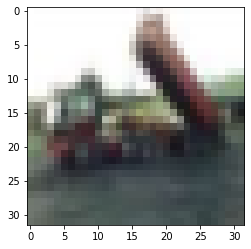

In [5]:
# View a few of the images
plt.imshow(train_images[2])
train_images.shape[2]

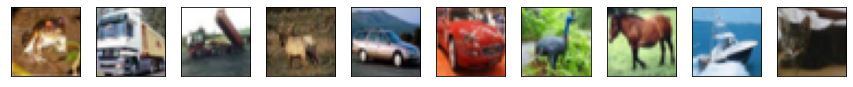

In [6]:
plt.figure(figsize=(15,15))
for i in range(10):
  plt.subplot(10,10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])

plt.show()

In [7]:
# Prepare the train and test images for a CNN
train_labels= to_categorical(train_labels)
test_labels= to_categorical(test_labels)

In [9]:
# Prepare the train and test data for a CNN
def prepare_data (train, test):
  train= train.reshape(train.shape[0], train.shape[1], train.shape[2], 3)
  test = test.reshape(test.shape[0], test.shape[1], test.shape[2], 3)
 
  train_norm = train.astype(np.float32)/ 255.0
  test_norm = test.astype(np.float32)/ 255.0
  return train_norm, test_norm

train_images, test_images = prepare_data(train_images, test_images)


In [9]:
# Split the data into a train and validation block
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)

### Review literature for CNN architectures and build at least 3 different architectures with varying depths, kernels, and normalization functions.  Be sure to split your data into a validation block and monitor loss and accuracy with graphs.  Build, compile, monitor, validate, and test each CNN architecture in one cell.  Try to get one of your CNN architectures to have a test accauracy above 80%.  You may use TensorBoard if you want.
      
#### Here are some links to get you started on reviewing CNN architectures.
#### https://www.kaggle.com/cdeotte/how-to-choose-cnn-architecture-mnist
#### https://medium.com/datadriveninvestor/five-powerful-cnn-architectures-b939c9ddd57b 

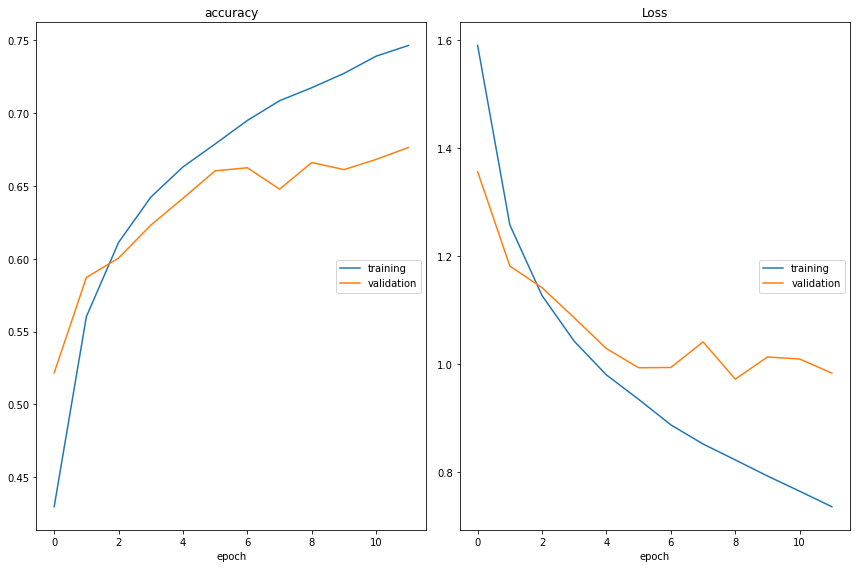

accuracy
	training         	 (min:    0.430, max:    0.747, cur:    0.747)
	validation       	 (min:    0.522, max:    0.676, cur:    0.676)
Loss
	training         	 (min:    0.736, max:    1.590, cur:    0.736)
	validation       	 (min:    0.972, max:    1.356, cur:    0.983)
1172/1172 [==============================] - 56s 48ms/step - loss: 0.7356 - accuracy: 0.7466 - val_loss: 0.9831 - val_accuracy: 0.6765
Epoch 12: early stopping
313/313 [==============================] - 4s 13ms/step - loss: 0.9892 - accuracy: 0.6721
['loss', 'accuracy']
[0.9891511797904968, 0.6721000075340271]


In [14]:
callback = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(10, activation ='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])
history = model.fit(x_train, y_train, epochs = 20, batch_size= 32, callbacks=[PlotLossesKeras(), callback], verbose=1,validation_data=(x_val, y_val))
results = model.evaluate(test_images, test_labels)
print(model.metrics_names)
print(results)

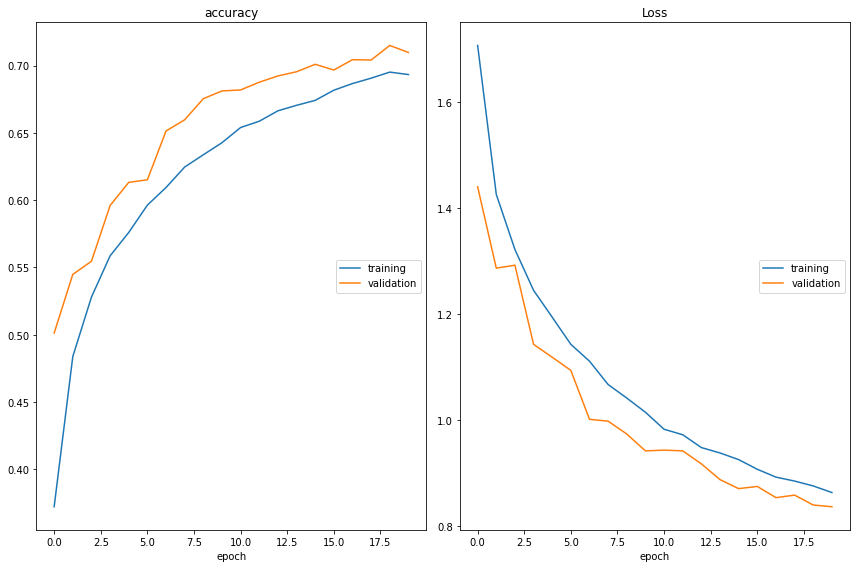

accuracy
	training         	 (min:    0.372, max:    0.695, cur:    0.693)
	validation       	 (min:    0.501, max:    0.715, cur:    0.710)
Loss
	training         	 (min:    0.863, max:    1.707, cur:    0.863)
	validation       	 (min:    0.836, max:    1.440, cur:    0.836)
313/313 [==============================] - 5s 14ms/step - loss: 0.8558 - accuracy: 0.7077
['loss', 'accuracy']
[0.8558181524276733, 0.7077000141143799]


In [18]:
model_1 = Sequential()
model_1.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Dropout(0.5))
model_1.add(Conv2D(64,(4,4),input_shape = (32,32,3),activation='relu'))
model_1.add(MaxPooling2D(pool_size = (2,2)))
model_1.add(Dropout(0.5))
model_1.add(Flatten())
model_1.add(Dense(128, activation ='relu'))
model_1.add(Dense(10, activation ='softmax'))
model_1.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics =['accuracy'])
history = model_1.fit(x_train, y_train, epochs = 20, batch_size= 50, callbacks=[PlotLossesKeras(), callback], verbose=1,validation_data=(x_val, y_val))
results = model_1.evaluate(test_images, test_labels)
print(model.metrics_names)
print(results)

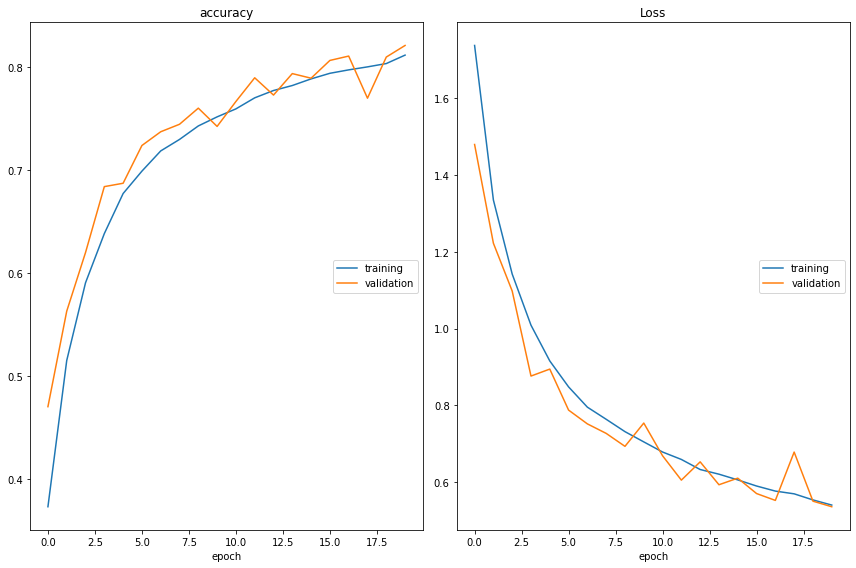

accuracy
	training         	 (min:    0.373, max:    0.812, cur:    0.812)
	validation       	 (min:    0.470, max:    0.821, cur:    0.821)
Loss
	training         	 (min:    0.540, max:    1.738, cur:    0.540)
	validation       	 (min:    0.536, max:    1.480, cur:    0.536)
938/938 [==============================] - 9s 10ms/step - loss: 0.5399 - accuracy: 0.8120 - val_loss: 0.5355 - val_accuracy: 0.8214


In [62]:


model_2 = Sequential()
model_2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model_2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Flatten())
model_2.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_2.add(Dense(10, activation='sigmoid'))

model_2.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model_2.fit(x_train, y_train, epochs = 20, batch_size= 40, callbacks=[PlotLossesKeras(), callback], verbose=1,validation_data=(x_val, y_val))


In [63]:
results = model_2.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.5452 - accuracy: 0.8148


In [19]:
backend.clear_session() 

Conclusion:

In this assignment, I have been able to create three different convolutional neural network models to classify the CIFAR10 dataset of images. With each classification the model accuracy improved, the last model gave an accuracy over 80% which is what we want from this assignment, and to achieve that i added more filters and techniques such as dropout, and batch normalization. In the last model, I used 64 neuron for all layers except the output wich is 10 and "Sigmoid" instead of "softmax", i also changed the bach_size to 40 to achieve higher accuracy.